# Import Libraries and Load Data set

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
data=pd.read_csv('gas_turbines.csv')

In [9]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [10]:
data.shape

(15039, 11)

In [11]:
data.isnull().sum()


AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [13]:

data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [14]:
data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

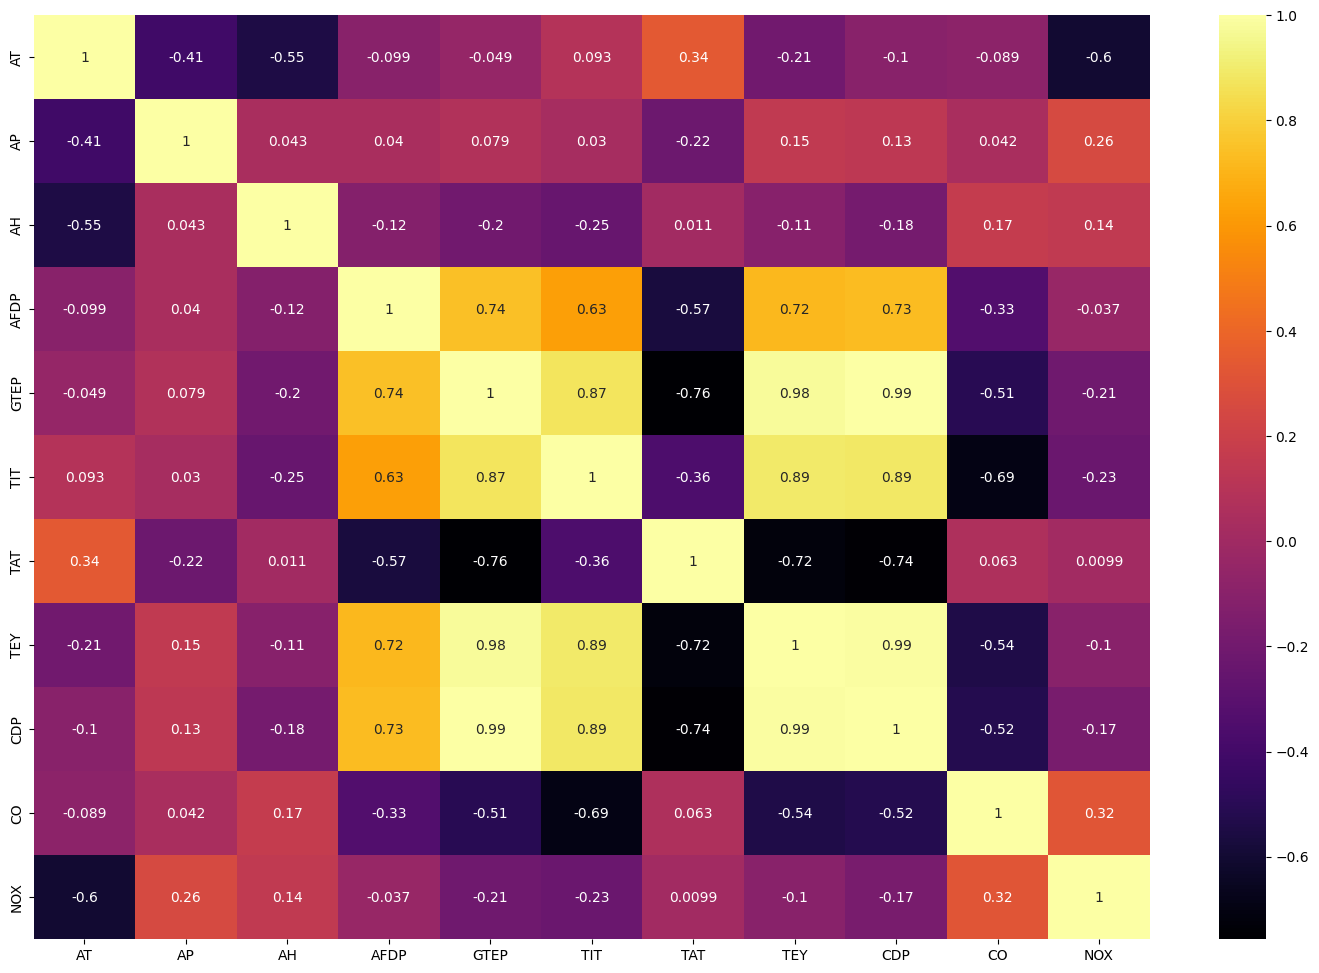

In [15]:
correlation = data.corr()
plt.figure(figsize=(18,12))
sns.heatmap(correlation, annot=True, cmap = 'inferno')
plt.show

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data.iloc[:,0:11])
scaler.transform(data.iloc[:,0:11])

In [19]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [21]:
input=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']
output=['TEY']
X=data[input]
y=data[output]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3)

In [24]:
#Using KERAS model
from keras.models import Sequential
from keras.layers import Dense
#create model
model = Sequential()
model.add(Dense(14, input_dim=10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))


In [25]:
# Compile model
Model=model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [26]:
# fit the keras model on the dataset
Model=model.fit(X_train, y_train,validation_split=0.33,epochs=100,batch_size=11)

Epoch 1/100
642/642 [==============================] - 5s 4ms/step - loss: 2724.8044 - mse: 2724.8042 - val_loss: 196.9756 - val_mse: 196.9756
Epoch 2/100
642/642 [==============================] - 2s 3ms/step - loss: 175.4849 - mse: 175.4849 - val_loss: 142.3390 - val_mse: 142.3390
Epoch 3/100
642/642 [==============================] - 1s 2ms/step - loss: 101.0055 - mse: 101.0055 - val_loss: 63.0141 - val_mse: 63.0141
Epoch 4/100
642/642 [==============================] - 2s 3ms/step - loss: 31.3383 - mse: 31.3383 - val_loss: 20.0877 - val_mse: 20.0877
Epoch 5/100
642/642 [==============================] - 2s 3ms/step - loss: 8.7122 - mse: 8.7122 - val_loss: 6.0781 - val_mse: 6.0781
Epoch 6/100
642/642 [==============================] - 2s 3ms/step - loss: 4.6028 - mse: 4.6028 - val_loss: 2.8225 - val_mse: 2.8225
Epoch 7/100
642/642 [==============================] - 2s 4ms/step - loss: 2.7823 - mse: 2.7823 - val_loss: 2.5929 - val_mse: 2.5929
Epoch 8/100
642/642 [====================

In [27]:
y_pred=model.predict(X_test)

141/141 [==============================] - 0s 2ms/step


In [28]:
accuracy = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], accuracy[1]*100))

141/141 [==============================] - 0s 2ms/step - loss: 0.7844 - mse: 0.7844
mse: 78.44%


In [29]:
#Getting accuracy 0% for backpropagation method, therefore applying hyperparameter method

#building the new model

def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="linear"))
    model.compile(loss="mean_squared_error",optimizer = "adam",metrics = ["mse"])
    return model

In [30]:
new_model = prep_model([1])
History=new_model.fit(X_train,y_train,epochs=200)
pred_train = new_model.predict(X_train)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 9397.4307 - mse: 9397.4307
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 262.4252 - mse: 262.4252
Epoch 3/200
329/329 [==============================] - 1s 4ms/step - loss: 256.4432 - mse: 256.4432
Epoch 4/200
329/329 [==============================] - 1s 2ms/step - loss: 248.9786 - mse: 248.9786
Epoch 5/200
329/329 [==============================] - 1s 2ms/step - loss: 239.6939 - mse: 239.6939
Epoch 6/200
329/329 [==============================] - 1s 2ms/step - loss: 229.0253 - mse: 229.0253
Epoch 7/200
329/329 [==============================] - 1s 2ms/step - loss: 216.9237 - mse: 216.9237
Epoch 8/200
329/329 [==============================] - 1s 2ms/step - loss: 203.7719 - mse: 203.7719
Epoch 9/200
329/329 [==============================] - 1s 2ms/step - loss: 189.8489 - mse: 189.8489
Epoch 10/200
329/329 [==============================] - 1s 2ms/step - loss: 174.7604 - mse: 174.76

In [31]:
# Predicting the Test set results
y_pred = new_model.predict(X_test)
y_pred

141/141 [==============================] - 1s 4ms/step


array([[133.90392],
       [133.14224],
       [133.44981],
       ...,
       [106.03511],
       [149.29883],
       [133.64374]], dtype=float32)

In [32]:
from sklearn.metrics import r2_score
result = r2_score(y_test, y_pred)
print(result)

0.9948365726089726


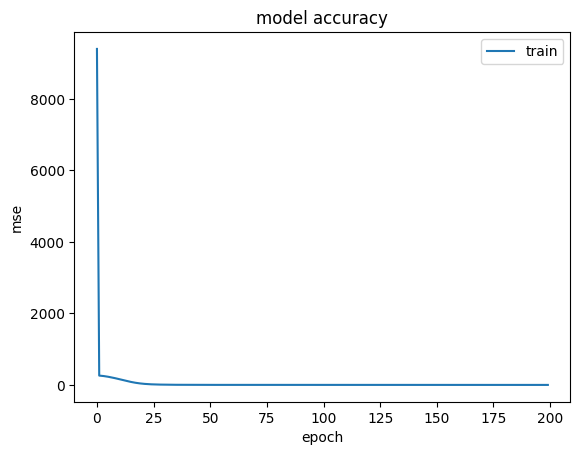

In [33]:
#from hyperparameter method got accuracy 99%
#summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(History.history['mse'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

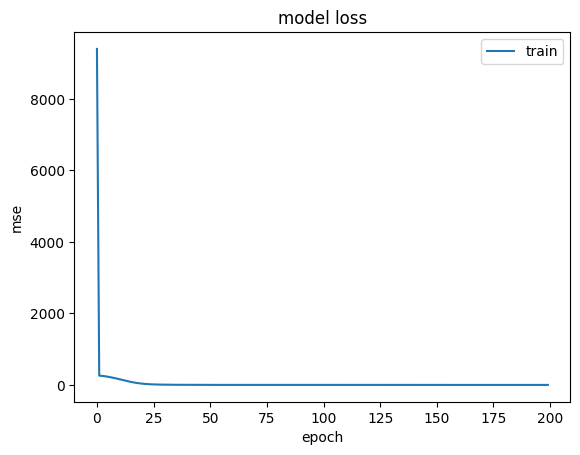

In [34]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(History.history['loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()